# Cas Kaggle

## **NOM**: Marc Rodriguez Cañero

## **NIU**: 1527739

La base de dades assignada en el meu cas és la següent: https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

#### Context

League of Legends és un MOBA (camp de batalla en línia multijugador) on s'enfronten 2 equips (blau i vermell). Hi ha 3 carrils, una jungla i 5 rols. L'objectiu és derrotar el Nexus enemic per guanyar el joc.

Imports

In [379]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

## Primera Sessió

Durant aquesta primera sessió realitzaré les primeres interacions amb la base de dades (dataset) per poder coneixèr-la i realitzar un anàlisis.

S'analitzaran els diferents atributs que la composen, per poder entendre'ls i **es fixarà quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades** justificant el per què de la decisió.

### Anàlisis de la base de dades

In [131]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',', encoding = "ISO-8859-1")
    return dataset

# Carreguem dataset
dataset = load_dataset('high_diamond_ranked_10min.csv')

print("Dimensionalitat de la BBDD:", dataset.shape)
print("\nTabla de la BBDD:")
display(dataset.head())

Dimensionalitat de la BBDD: (9879, 40)

Tabla de la BBDD:


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.800,17047,197,55,-643,8,19.700,1656.700
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.800,17438,240,52,2908,1173,24.000,1762.000
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.800,17254,203,28,1172,1033,20.300,1728.500
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.000,17961,235,47,1321,7,23.500,1647.800
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.000,18313,225,67,1004,-230,22.500,1740.400


A partir de la tabla ja podem anar extraïent més informació de la base de dades. Aquesta base de dades, com hem dit, tracta sobre el joc League Of Legends. 

La base de dades esta formada per 9879 files i 4 columnes.

Cada fila mostrarà les estadístiques de una partida disputada en aquest joc (fins a un total de 9879 jocs ja que té 9879 files). En la taula podem veure les 5 primeres files de la base de dades. Les columnes seràn diferents atributs o característiques del joc. Com he comentat anteriorment, el joc està format per dos equips, un blau i un altre vermell, per això, podem veure que alguns atributs tenen la paraula red o blue, per específicar a quin equip pertany el atribut.


Continuem amb l'anàlisis desprès de les primeres impressions.

### Netejar dades

#### Tipus de dades

In [132]:
print("Informació tipus de dades de la BBDD:")
dataset.info()

Informació tipus de dades de la BBDD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold           

Podem veure que tots els atributs son númerics, és a dir, int (el número no té decimals) o float (el número té decimals). Per tractar-los a tots de la mateixa manera, ja que tots són númerics, tots els atributs int pasaran a ser float. Més endavant ens pots aportar beneficis que tots siguin del mateix tipus a la hora de tractar dades. 

#### Convertim tots els atributs a float

In [133]:
for col in dataset:
	dataset[col] = dataset[col].astype(float)

Comprovació: 

In [134]:
print("Informació tipus de dades de la BBDD:")
dataset.info()

Informació tipus de dades de la BBDD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   float64
 1   blueWins                      9879 non-null   float64
 2   blueWardsPlaced               9879 non-null   float64
 3   blueWardsDestroyed            9879 non-null   float64
 4   blueFirstBlood                9879 non-null   float64
 5   blueKills                     9879 non-null   float64
 6   blueDeaths                    9879 non-null   float64
 7   blueAssists                   9879 non-null   float64
 8   blueEliteMonsters             9879 non-null   float64
 9   blueDragons                   9879 non-null   float64
 10  blueHeralds                   9879 non-null   float64
 11  blueTowersDestroyed           9879 non-null   float64
 12  blueTotalGold           

#### Rang de dades

En aquest apartat, analitzarem el rang de cadascun dels atributs per a poder veure si hi han atributs que, per exemple, nomès ponde tenir un valor i que, per tant, no ens estan aportant informació.

In [135]:
for col in dataset:
	print(dataset[col].unique())

[4.51915782e+09 4.52337195e+09 4.52147453e+09 ... 4.52771372e+09
 4.52762831e+09 4.52377294e+09]
[0. 1.]
[ 28.  12.  15.  43.  75.  18.  16.  13.  20.  33.  14.  17.  21.  11.
  78.  19. 105.  22.  40.  24.  36.  41.  37.  29. 122.  52.  32.  50.
  83.  30.  38.  87.  23.  70.  10.  91.  54.  35.  86.  25.  42.  68.
 124.  34.  31.  44.  27.  57.  39.  56.  46.  53.  85.  76.  48. 143.
  97.  51. 146.  88.  62.  94.  81.   9.  72.  60.  26.  63.  55.  65.
  59. 149.  67.  80. 104.  47. 123.  73.  84.  45.  82. 156. 165.  69.
 108.  49.   8. 141. 111.  58.   5. 102. 128.  90.  74.  77.  95.  64.
 117. 127. 129. 138. 164. 110.  93.  89. 148. 120.  92. 115.  66. 132.
 221.  61.  71. 114. 142.  79. 106. 145.   7. 130. 144.  99. 100. 109.
 103. 183. 118. 125. 209. 159. 203. 198. 176. 163. 126. 157. 116. 167.
 136. 133. 151. 152. 250. 185. 137.]
[ 2.  1.  0.  4.  3.  5.  7.  6. 13. 16.  9. 11. 12. 10.  8. 15. 14. 18.
 23. 17. 19. 24. 25. 21. 22. 20. 27.]
[1. 0.]
[ 9.  5.  7.  4.  6. 11.  3. 

Cap atribut té només un valor, per tant, tots ens estan aportant informació, no podem eliminar cap. 

Hem pogut veure també que tenim alguns atributs binaris, és a dir, que només tenen dos valors possibles.

#### Comprovació valors null

In [136]:
print(dataset.isnull().sum())

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

A més a més, també podem veure que cap atribut té valors null, per tant, tampoc haurem d'eliminar cap fila, ja que si algun atribut tingués un valor null, podriem optar per eliminar la fila a la qual correspongui aquest valor.

#### Eliminar columnes

Tot i que hem vist que sobre el paper no hauriem d'eliminar cap fila ni columna, a partir de la informació que especifíca cada atribut, podem veure que el atribut gameId no ens dona cap informació de les estadístiques de la partida, sinò que simplement és el identificador. No ens aporta cap informació relevant per a ponder realitzar els models (prediccions) posteriorment i, per tant, podriem eliminar aquest atribut (columna).

In [137]:
dataset = dataset.drop(['gameId'], axis=1)

Comprovació:

In [138]:
print("Informació tipus de dades de la BBDD:")
dataset.info()

Informació tipus de dades de la BBDD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   float64
 1   blueWardsPlaced               9879 non-null   float64
 2   blueWardsDestroyed            9879 non-null   float64
 3   blueFirstBlood                9879 non-null   float64
 4   blueKills                     9879 non-null   float64
 5   blueDeaths                    9879 non-null   float64
 6   blueAssists                   9879 non-null   float64
 7   blueEliteMonsters             9879 non-null   float64
 8   blueDragons                   9879 non-null   float64
 9   blueHeralds                   9879 non-null   float64
 10  blueTowersDestroyed           9879 non-null   float64
 11  blueTotalGold                 9879 non-null   float64
 12  blueAvgLevel            

#### Outliers

En moltes ocasions, la existencia d'outliers fan que els nostre model (prediccions) no siguin correcte. Per a veure si existeixen outliers podriem mostrar gràficament tots els atributs, però requerirà de molt temps. En aquest apartat mostrarem només un exemple d'un atribut, per veure que realment existeixen outlier.

<IPython.core.display.Javascript object>


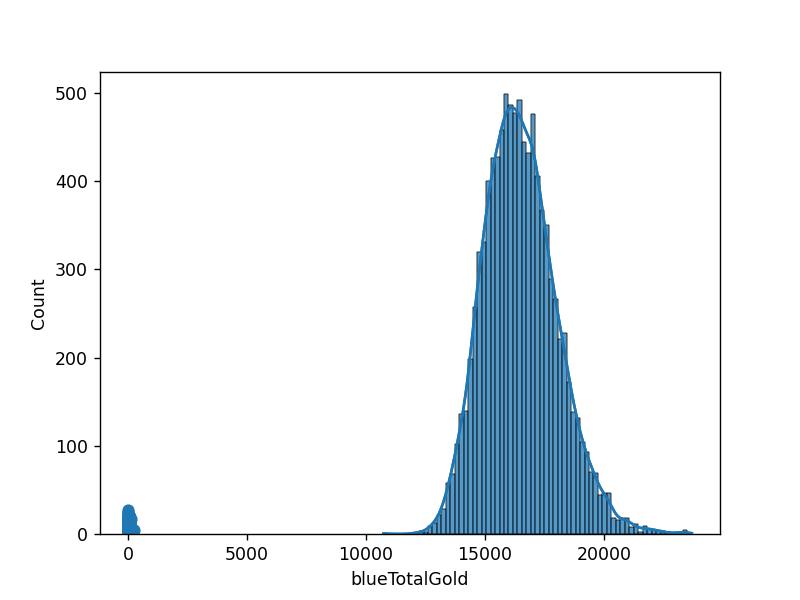

In [146]:
#Atribut blueWardsPlaced
data = dataset.values
x = data[:, :2]
y = data[:, 2]
plt.figure()

ax = plt.scatter(x[:,1], y)

El que farem directament per eliminar aquests possibles outliers es normalitzar les dades.

##### Normalització i estandarització

Per normalitzar les dades, en primer lloc, ens hem d'assegurar que els atributs segueixen una distribució normal. Mostrarem 1 atribut d'exemple per demostrar que es segueix una distribució "aproximadament" normal en molts atributs.

In [148]:
sns.histplot(data = dataset, x = dataset['blueTotalGold'], kde = True)  

<AxesSubplot:xlabel='blueTotalGold', ylabel='Count'>

( Gràfic mostrat més amunt")

Podem veure que es una distribució normal ja que segueix la forma d'una campana de Gauss.

Normalització:

In [150]:
#Funció per estandaritzar les dades segons la mitjana i variança

def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

dataset_N = dataset.copy()
x = dataset_N
dataset_N = standarize(dataset)

C:\Users\Marc\AppData\Local\Temp\ipykernel_18228\3915555236.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_t = x_train - mean[None, :]
C:\Users\Marc\AppData\Local\Temp\ipykernel_18228\3915555236.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_t /= std[None, :]


Comprovació mostrant les primeres 5 files del nou dataset normalitzat:

In [151]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset_N.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,-0.998,0.317,-0.379,0.990,0.935,-0.047,1.071,-0.879,-0.753,-0.481,...,-0.198,0.052,-0.410,-0.763,-0.929,0.368,-0.256,-0.013,-0.929,0.052
1,-0.998,-0.571,-0.839,-1.010,-0.393,-0.388,-0.405,-0.879,-0.753,-0.481,...,4.412,0.759,-0.410,-0.437,1.034,0.069,1.191,0.593,1.034,0.759
2,-0.998,-0.404,-1.299,-1.010,0.271,1.657,-0.651,0.719,1.328,-0.481,...,-0.198,0.534,-0.410,-0.590,-0.655,-2.325,0.484,0.520,-0.655,0.534
3,-0.998,1.149,-0.839,-1.010,-0.725,-0.388,-0.405,0.719,-0.753,2.078,...,-0.198,-0.007,0.245,-0.001,0.806,-0.430,0.544,-0.014,0.806,-0.007
4,-0.998,2.925,0.540,-1.010,-0.061,-0.047,-0.159,-0.879,-0.753,-0.481,...,-0.198,0.614,0.245,0.293,0.349,1.564,0.415,-0.137,0.349,0.614


In [ ]:
Nou dataset normalitzat: 

In [397]:
print("Dimensionalitat de la BBDD:", dataset_N.shape)
print("\nTabla de la BBDD:")
display(dataset_N.head())

Dimensionalitat de la BBDD: (9879, 39)

Tabla de la BBDD:


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,-0.998,0.317,-0.379,0.990,0.935,-0.047,1.071,-0.879,-0.753,-0.481,...,-0.198,0.052,-0.410,-0.763,-0.929,0.368,-0.256,-0.013,-0.929,0.052
1,-0.998,-0.571,-0.839,-1.010,-0.393,-0.388,-0.405,-0.879,-0.753,-0.481,...,4.412,0.759,-0.410,-0.437,1.034,0.069,1.191,0.593,1.034,0.759
2,-0.998,-0.404,-1.299,-1.010,0.271,1.657,-0.651,0.719,1.328,-0.481,...,-0.198,0.534,-0.410,-0.590,-0.655,-2.325,0.484,0.520,-0.655,0.534
3,-0.998,1.149,-0.839,-1.010,-0.725,-0.388,-0.405,0.719,-0.753,2.078,...,-0.198,-0.007,0.245,-0.001,0.806,-0.430,0.544,-0.014,0.806,-0.007
4,-0.998,2.925,0.540,-1.010,-0.061,-0.047,-0.159,-0.879,-0.753,-0.481,...,-0.198,0.614,0.245,0.293,0.349,1.564,0.415,-0.137,0.349,0.614


Nou dataset original: 

In [398]:
print("Dimensionalitat de la BBDD:", dataset.shape)
print("\nTabla de la BBDD:")
display(dataset.head())

Dimensionalitat de la BBDD: (9879, 39)

Tabla de la BBDD:


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0.000,28.000,2.000,1.000,9.000,6.000,11.000,0.000,0.000,0.000,...,0.000,16567.000,6.800,17047.000,197.000,55.000,-643.000,8.000,19.700,1656.700
1,0.000,12.000,1.000,0.000,5.000,5.000,5.000,0.000,0.000,0.000,...,1.000,17620.000,6.800,17438.000,240.000,52.000,2908.000,1173.000,24.000,1762.000
2,0.000,15.000,0.000,0.000,7.000,11.000,4.000,1.000,1.000,0.000,...,0.000,17285.000,6.800,17254.000,203.000,28.000,1172.000,1033.000,20.300,1728.500
3,0.000,43.000,1.000,0.000,4.000,5.000,5.000,1.000,0.000,1.000,...,0.000,16478.000,7.000,17961.000,235.000,47.000,1321.000,7.000,23.500,1647.800
4,0.000,75.000,4.000,0.000,6.000,6.000,6.000,0.000,0.000,0.000,...,0.000,17404.000,7.000,18313.000,225.000,67.000,1004.000,-230.000,22.500,1740.400


### Variable objectiu

Desprès de realitzar una neteja de les dades, ja hem pogut tractar amb els atributs i els hem pogut conèixer. En aquest punt, ja podriem determinar la nostre variable objectiu. La nostra variable objectiu serà l'atribut blueWins. 

Aquest és el més important de tots perque és un atribut binàri que indica quin equip guanya la partida. Tindrà el valor de 1 si el equip blau guanya la partida o un atribut de 0 si el equip vermell guanya. 

Per a realitzar les nostres prediccions, al ser una base de dades que tracta sobre un joc, el atribut que més ens interesa saber és el que ens indica el guanyador, ja que a tots els jocs es juga amb la intenció de guanyar.

### Atributs importants

Com en qualsevol joc, hi han una série d'habilitats que si un jugador poseeix té més possibilitats de guanyar que l'altre jugador. D'aquesta manera, no tots els atributs seran igual d'importants, hi han alguns que condicionen més el transcurs de la partida que d'altres. 

Per exemple, blueKills, que és l'atribut que indica quantes morts ha realitzat el equip blau, serà un atribut més important que blueTotalGold, que indica el or acumulat per el equip blau. No obstant, tots dos condicionen a la hora de saber si el equip blau guanyarà o no la partida.

## Segona Sessió

Durant aquesta sessió realitzaren el processament de les dades, és a dir, reduirem la seva dimensionalitat veient diferents patrons i correlacions i deifinirem conjunts d'aprenentatge (train-val-test) per a poder aplicar el models bàsics scikit-learn per aquests conjunts.

### Reducció dimensionalitat

Quan es treballa en dades n-dimensionals (més d'un atribut), una opció és reduir la seva n-dimensionalitat i escollir 2,3,4... components principals, obtenint unes dades que (ara sí) poden ser visualitzables en un nou espai. Per això, aplicarem dos técniques, PCA (Anàlisis Principal de les Components) i TNSE (t-nse). 

A la hora de realitzar una reducció de la dimensionalitat cal tenir les dades normalitzades, per això ho hem fet anteriorment.

#### PCA

Com que en aquest punt tenim 39 columnes (ja que em eliminat una), podem escollir multiples opcions a la hora d'escollir el número de components prinicipals quan fem PCA. El que farem es que realitzarem PCA escollint 2,3 i 4 components principals i analitzarem la seva variança en cada cas. D'aquesta manera podrem saber el número de component principals òptim.

##### 2 Components principals

Començarem aplicant PCA en la base de dades per a reduir la seva dimensionalitat a 2 component principals. D'aquesta manera, posteriorment, també podrem veure una representació en dos dimensions.

In [197]:
# PCA
datasetPCA1 = dataset_N.copy()
nComponents = 2

x1 = datasetPCA1.iloc[:,0:40].values

pca = PCA(n_components = nComponents, svd_solver = 'full')
principalComponents = pca.fit_transform(x1)

pca.components_

array([[-0.15442101, -0.00592284, -0.02446841, -0.11042852, -0.1820449 ,
         0.17805155, -0.14965033, -0.10130699, -0.08750521, -0.05455541,
        -0.07582127, -0.22397062, -0.19363327, -0.21073177, -0.1302916 ,
        -0.056382  , -0.27411041, -0.26303875, -0.1302916 , -0.22397062,
         0.00707119,  0.02924245,  0.11042852,  0.17805155, -0.1820449 ,
         0.14328776,  0.10239101,  0.08849455,  0.05610136,  0.07014534,
         0.22040122,  0.19426162,  0.21036771,  0.13036583,  0.05865144,
         0.27411041,  0.26303875,  0.13036583,  0.22040122],
       [-0.00421431,  0.00972583, -0.02559098,  0.01276183,  0.30935518,
         0.31596408,  0.27225256, -0.0087436 , -0.00419245, -0.0088415 ,
         0.06562656,  0.21325164, -0.05681506, -0.06350513, -0.22824606,
        -0.14198468, -0.00074085, -0.00499056, -0.22824606,  0.21325164,
        -0.00813526, -0.03281237, -0.01276183,  0.31596408,  0.30935518,
         0.2792862 , -0.03083519, -0.03270485, -0.00876379,  0.

Els atributs que tenen més importancia (més pes) són el que tenen el valor més gran.

In [198]:
#Variança
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2"})


,VarPerc,cumVarPerc
PC1,32.732,32.732
PC2,11.829,44.561


La variança acumulada que tenim escollint 2 components principals és de 44,56%

Representació gràfica de PCA amb dos component principals:

<IPython.core.display.Javascript object>


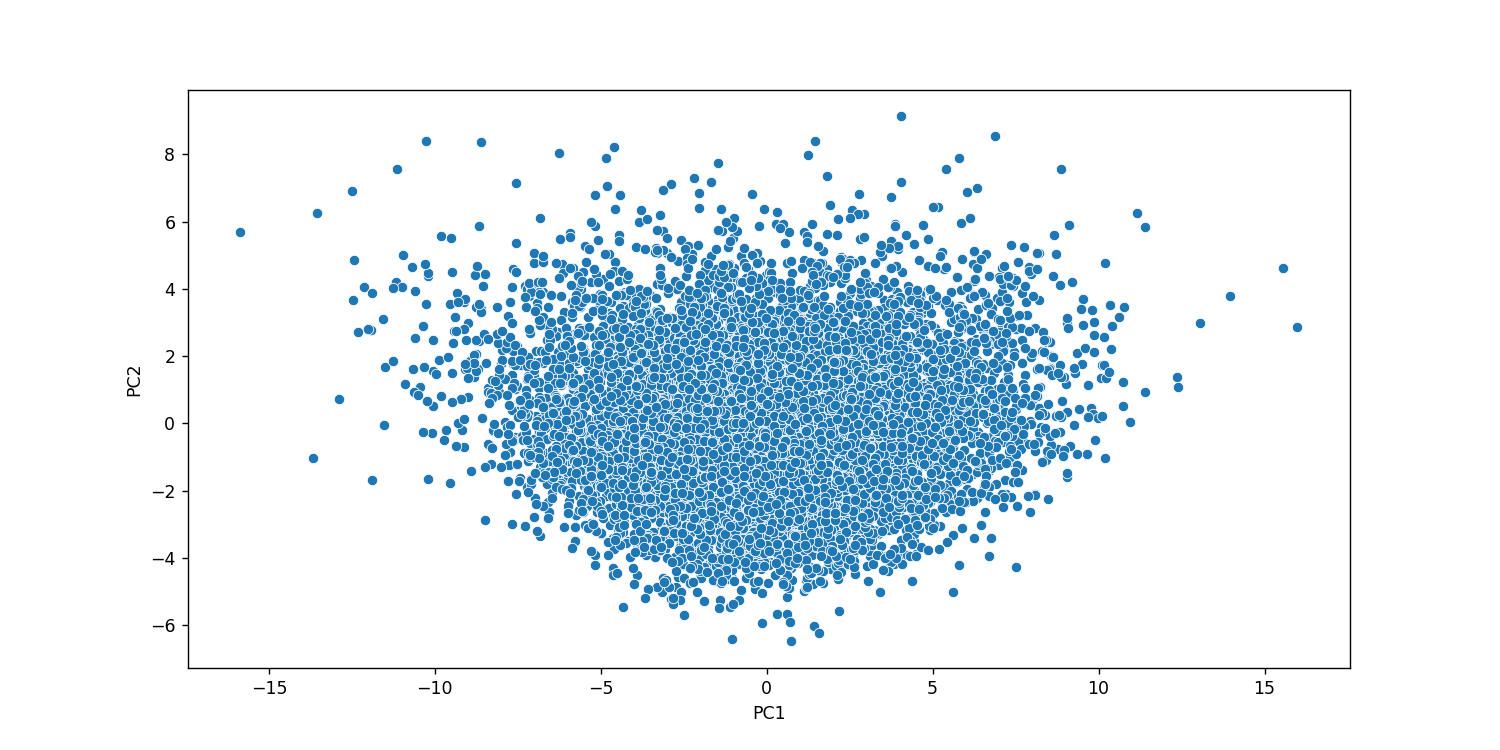

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

In [202]:
componentsDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pcaDf = pd.concat([componentsDf], axis=1)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2",palette=sns.color_palette("hls", 3))

##### 3 Components principals

In [167]:
# PCA
datasetPCA1 = dataset_N.copy()
nComponents = 3

x1 = datasetPCA1.iloc[:,0:40].values

pca = PCA(n_components = nComponents, svd_solver = 'full')
principalComponents = pca.fit_transform(x1)

pca.components_

array([[-0.15442101, -0.00592284, -0.02446841, -0.11042852, -0.1820449 ,
         0.17805155, -0.14965033, -0.10130699, -0.08750521, -0.05455541,
        -0.07582127, -0.22397062, -0.19363327, -0.21073177, -0.1302916 ,
        -0.056382  , -0.27411041, -0.26303875, -0.1302916 , -0.22397062,
         0.00707119,  0.02924245,  0.11042852,  0.17805155, -0.1820449 ,
         0.14328776,  0.10239101,  0.08849455,  0.05610136,  0.07014534,
         0.22040122,  0.19426162,  0.21036771,  0.13036583,  0.05865144,
         0.27411041,  0.26303875,  0.13036583,  0.22040122],
       [-0.00421431,  0.00972583, -0.02559098,  0.01276183,  0.30935518,
         0.31596408,  0.27225256, -0.0087436 , -0.00419245, -0.0088415 ,
         0.06562656,  0.21325164, -0.05681506, -0.06350513, -0.22824606,
        -0.14198468, -0.00074085, -0.00499056, -0.22824606,  0.21325164,
        -0.00813526, -0.03281237, -0.01276183,  0.31596408,  0.30935518,
         0.2792862 , -0.03083519, -0.03270485, -0.00876379,  0.

In [169]:
#Variança
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2",2:"PC3"})


,VarPerc,cumVarPerc
PC1,32.732,32.732
PC2,11.829,44.561
PC3,6.830,51.391


La variança acumulada que tenim escollint 3 components principals és de 51,391%

##### 4 Components principals

In [186]:
# PCA
datasetPCA1 = dataset_N.copy()
nComponents = 4

x1 = datasetPCA1.iloc[:,0:40].values

pca = PCA(n_components = nComponents, svd_solver = 'full')
principalComponents = pca.fit_transform(x1)

pca.components_

array([[-0.15442101, -0.00592284, -0.02446841, -0.11042852, -0.1820449 ,
         0.17805155, -0.14965033, -0.10130699, -0.08750521, -0.05455541,
        -0.07582127, -0.22397062, -0.19363327, -0.21073177, -0.1302916 ,
        -0.056382  , -0.27411041, -0.26303875, -0.1302916 , -0.22397062,
         0.00707119,  0.02924245,  0.11042852,  0.17805155, -0.1820449 ,
         0.14328776,  0.10239101,  0.08849455,  0.05610136,  0.07014534,
         0.22040122,  0.19426162,  0.21036771,  0.13036583,  0.05865144,
         0.27411041,  0.26303875,  0.13036583,  0.22040122],
       [-0.00421431,  0.00972583, -0.02559098,  0.01276183,  0.30935518,
         0.31596408,  0.27225256, -0.0087436 , -0.00419245, -0.0088415 ,
         0.06562656,  0.21325164, -0.05681506, -0.06350513, -0.22824606,
        -0.14198468, -0.00074085, -0.00499056, -0.22824606,  0.21325164,
        -0.00813526, -0.03281237, -0.01276183,  0.31596408,  0.30935518,
         0.2792862 , -0.03083519, -0.03270485, -0.00876379,  0.

In [187]:
#Variança
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2",2:"PC3",3:"PC4"})

,VarPerc,cumVarPerc
PC1,32.732,32.732
PC2,11.829,44.561
PC3,6.830,51.391
PC4,6.278,57.669


La variança acumulada que tenim escollint 4 components principals és de 57,669%

##### Comparativa de variança

Com hem pogut observar a la hora de fer els càlculs de la variança acumulada, a mesura que augmentem el número de components principals augmenta la variança. Per tant, el número de components principals més óptim és de 4 (número més elevat). 

Més endavant, a la hora de fer models, quan es vulgui fer probes aplicant la técnica PCA, s'utilitzarà PCA amb 4 components principals.

In [188]:
principalDf = pd.DataFrame(data = principalComponents)

datasetPCA = pd.concat([ principalDf], axis = 1)
display(datasetPCA)

,0,1,2,3
0,-0.588,2.399,-0.061,1.834
1,4.217,-0.232,1.848,2.081
2,2.303,3.253,-2.452,2.154
3,1.388,-0.986,-1.679,0.129
4,1.340,-0.295,1.659,-0.905
...,...,...,...,...
9874,-3.668,-0.556,-1.659,-0.154
9875,-1.668,-1.555,-1.230,-0.956
9876,4.050,-0.276,1.097,-2.254
9877,1.162,-3.629,-2.570,0.905


#### TSNE

De la mateixa manera que hem fet amb PCA, realitzarem TNSE escollint 2 i 3 components principals (no podem escollir 4 ja que tsne ens diu que el nombre de components principals ha de ser inferior a 4) i analitzarem la seva variança en cada cas. D'aquesta manera podrem saber el número de component principals òptim.

##### 2 Components principals

In [333]:
# TSNE
datasetTSNE = dataset_N.copy()
nComponents = 2

x1 = datasetTSNE.iloc[:,0:40].values

tsne = TSNE(n_components = nComponents, random_state=123)
principalComponents = tsne.fit_transform(x1)

principalComponents

C:\Users\Marc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Marc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-31.313934, -14.353336],
       [ 80.01531 ,  12.161449],
       [ 47.847664, -10.894097],
       ...,
       [ 19.210583,  44.92268 ],
       [  8.155798, -50.583633],
       [-53.173042,  18.178898]], dtype=float32)

Els atributs que tenen més importancia (més pes) són el que tenen el valor més gran.

Representació gràfica de TSNE amb dos component principals:

<IPython.core.display.Javascript object>


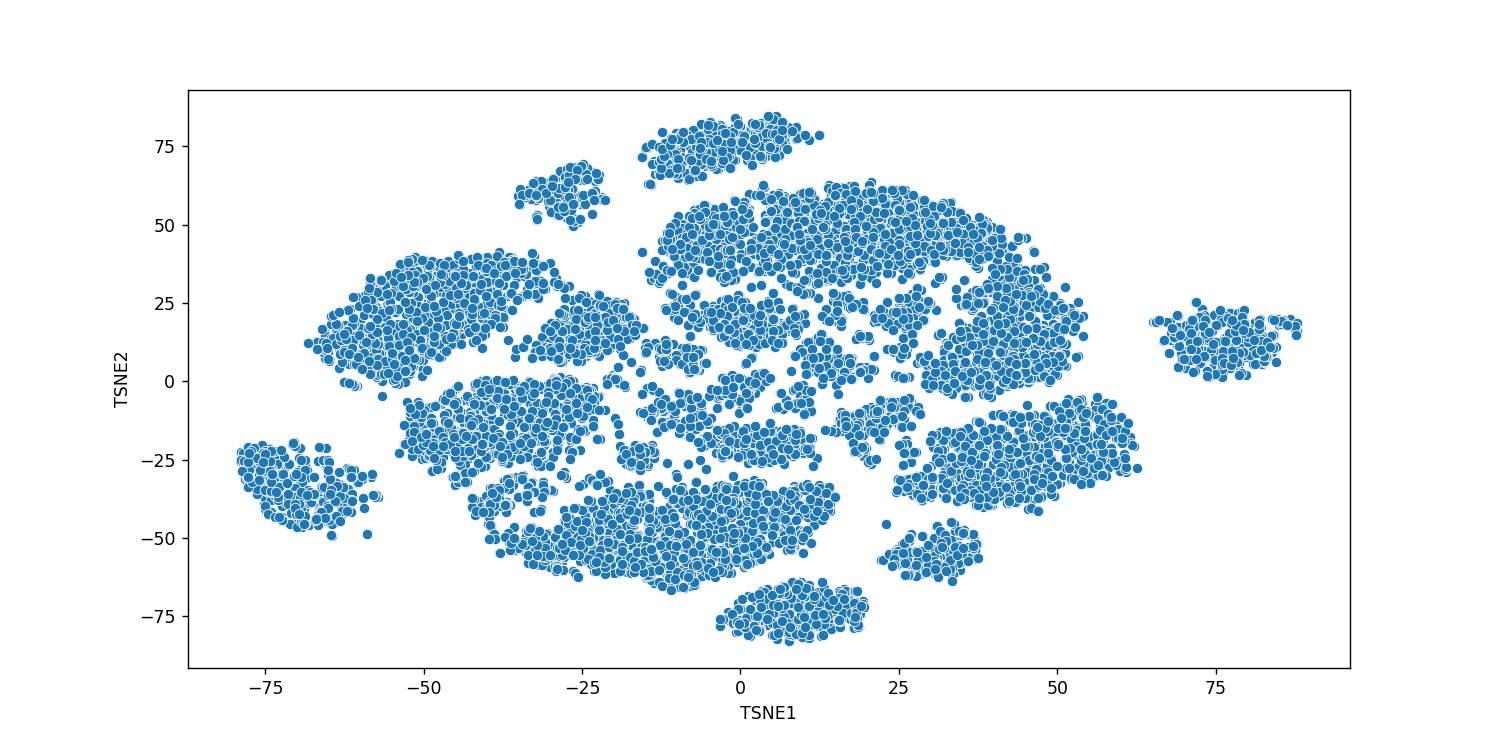

<AxesSubplot:xlabel='TSNE1', ylabel='TSNE2'>

In [208]:
componentsDf = pd.DataFrame(data = principalComponents, columns = ['TSNE1', 'TSNE2'])
pcaDf = pd.concat([componentsDf], axis=1)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x= "TSNE1" , y="TSNE2",palette=sns.color_palette("hls", 3))

In [228]:
#Variança
# Number of observations
def variança(principalComponents):
    n = len(principalComponents)
    # Mean of the data
    mean = sum(principalComponents) / n
     # Square deviations
    for x in principalComponents:
        deviations = [(x - mean) ** 2]
        
    # Variance
    variance = sum(deviations) / n
    return variance

v1=variança(principalComponents[:,0])
v2=variança(principalComponents[:,1])
cumVar=v1+v2

print(cumVar*100)

31.65581248936863


La variança acumulada que tenim escollint 2 components principals és de 31,65%

##### 3 Components principals

In [229]:
# TSNE
datasetTSNE = dataset_N.copy()
nComponents = 3

x1 = datasetTSNE.iloc[:,0:40].values

tsne = TSNE(n_components = nComponents, random_state=123)
principalComponents = tsne.fit_transform(x1)

principalComponents

C:\Users\Marc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Marc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ -5.4300094,  -8.81099  ,  -4.6212864],
       [ -8.452175 ,   2.5372195,  26.413145 ],
       [  4.8139567,   4.9448266,  13.086149 ],
       ...,
       [ -9.4153385,  16.491146 ,   0.9544775],
       [ -1.0291142, -20.178293 ,  10.070426 ],
       [-12.457342 ,  -2.251133 , -12.759978 ]], dtype=float32)

In [231]:
v1=variança(principalComponents[:,0])
v2=variança(principalComponents[:,1])
v3=variança(principalComponents[:,2])
cumVar=v1+v2+v3

print(cumVar*100)

3.275453727372571


La variança acumulada que tenim escollint 3 components principals és de 3,65%

##### Comparativa de variança

Com hem pogut observar a la hora de fer els càlculs de la variança acumulada, a mesura que augmentem el número de components principals disminueix la variança. Per tant, el número de components principals més óptim és de 2 (número més petit). 

Més endavant, a la hora de fer models, quan es vulgui fer probes aplicant la técnica TSNE, s'utilitzarà TSNE amb 2 components principals.

In [233]:
# TSNE
datasetTSNE = dataset_N.copy()
nComponents = 2

x1 = datasetTSNE.iloc[:,0:40].values

tsne = TSNE(n_components = nComponents, random_state=123)
principalComponents = tsne.fit_transform(x1)

principalComponents

C:\Users\Marc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Marc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-31.313934, -14.353336],
       [ 80.01531 ,  12.161449],
       [ 47.847664, -10.894097],
       ...,
       [ 19.210583,  44.92268 ],
       [  8.155798, -50.583633],
       [-53.173042,  18.178898]], dtype=float32)

In [405]:
principalDf = pd.DataFrame(data = principalComponents)

datasetTSNE = pd.concat([ principalDf], axis = 1)
display(datasetTSNE)

,0,1
0,-31.314,-14.353
1,80.015,12.161
2,47.848,-10.894
3,11.330,9.458
4,13.260,46.979
...,...,...
9874,-14.140,-53.639
9875,9.503,-7.004
9876,19.211,44.923
9877,8.156,-50.584


#### Comparativa PCA vs TNSE

Les dues técniques ens disminueixen la dimensionalitat de la base de dades, però estudiant la variança i el gràfic en el cas més òptim de cada técnica, veiem que amb PCA obtenim una variança del 57,669% i amb TNSE del 31,65%. 

PCA té una variança més elevada. No obstant, si haguessim d'escollir alguna de les dues técniques, un altre factor a tenir en compte és que TNSE només pot tenir com a màxim 3 components principals i que el temps d'execució per a realitzar la técnica és més elevat.

De totes formes, més endavant, realitzarem diverses probes a la hora de fer models amb les bases de dades que tenim després d'utilitzar les dues técniques (datasetPCA i datasetTSNE).

datasetPCA:

In [406]:
print("Dimensionalitat de la BBDD:", datasetPCA.shape)
print("\nTabla de la BBDD:")
display(datasetPCA.head())

Dimensionalitat de la BBDD: (9879, 4)

Tabla de la BBDD:


,0,1,2,3
0,-0.588,2.399,-0.061,1.834
1,4.217,-0.232,1.848,2.081
2,2.303,3.253,-2.452,2.154
3,1.388,-0.986,-1.679,0.129
4,1.340,-0.295,1.659,-0.905


datasetTSNE:

In [407]:
print("Dimensionalitat de la BBDD:", datasetTNSE.shape)
print("\nTabla de la BBDD:")
display(datasetTNSE.head())

Dimensionalitat de la BBDD: (9879, 2)

Tabla de la BBDD:


,0,1
0,-31.314,-14.353
1,80.015,12.161
2,47.848,-10.894
3,11.330,9.458
4,13.260,46.979


### Definició conjunts d'aprenentatge

Per a poder començar a realitzar els primers models, cal que decidim com distribuim les dades de la base de dades per a que tinguem com a resultat tres conjunts diferents (test-val-train). 

En primer lloc, com que realitzarem primer els model bàsics de scikit-learn, només dividirem la base de dades en dos conjunts, un de test i l'altre de train.

Relitzarem diverses probes de prediccions amb els model bàsics cambiant el percentatge de dades test i train per evaluar quina és la millor distribució de train-test. 

Posteriorment, aplicarem la técnica de validació creuada K-fold per obtenir la millor distribució dels conjunts train-val-test, en la que, ara si, també tindrem un conjunt de validació.

### Models bàscis de scikit-learn

Abans de començar amb els anàlisis de diferents models, comentar que en aquests apartats només extraurem unes conclusions ràpides dels diferents models. En el últim apartat d'aquests document és quan realitzarem comparacions de tots els anàlisis.

Els primers models que crearem, com hem dit anteriorment, són els models bàscis de scikit-learn, que hem considerat que seran svm (amb kernel gaussiana), regressió lineal i regressió logística.

El que cambiarem en les diferents probes serà, com hem dit, el conjunt de test i train i també probarem amb les diferents bases de dades que hem obtingut en els anteriors apartats, la base de dades original, la base de dades normalitzada, la base de dades amb PCA i la base de dades amb TSNE.

Per analitzar cada model, analitzarem les métriques del error quadràtic mitjà, la precisió i el temps d'execució.

In [385]:
#Métriques
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import time
from statsmodels.tools.eval_measures import mse

##### Primer anàlisis test-train

Inicialment, només realitzarem les probes amb la base de dades original per analitzar els valors de train-test. 

Utilitzarem també com a variables dependents totes les altres variables. La variable objectiu com em dit en apartats anteriors, serà la variable blueWins

##### Base de dades original

####### Test 40% Train 60%

SVM amb kernel gaussiana:

In [322]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.40, random_state=101)
svc = SVC(kernel='rbf')

#Realitzem la predicció
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",svc.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.7214068825910931
MSE:  0.2785931174089069

 [[1433  542]
 [ 559 1418]]

               precision    recall  f1-score   support

         0.0       0.72      0.73      0.72      1975
         1.0       0.72      0.72      0.72      1977

    accuracy                           0.72      3952
   macro avg       0.72      0.72      0.72      3952
weighted avg       0.72      0.72      0.72      3952

Temps execució:  3.368422746658325


Regressió lineal:

In [337]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.40, random_state=101)
modelo = LinearRegression()

#Realitzem la predicció
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",modelo.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
#No podem fer ni matriu de confusió ni classification report
print("Temps execució: ",final-inicio)

Precisió:  0.2681329361204289
MSE:  0.18296671911031925
Temps execució:  1.0087950229644775


Regressió logística

In [338]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=101)
model = LogisticRegression()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.72165991902834
MSE:  0.2783400809716599

 [[1414  561]
 [ 539 1438]]

               precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      1975
         1.0       0.72      0.73      0.72      1977

    accuracy                           0.72      3952
   macro avg       0.72      0.72      0.72      3952
weighted avg       0.72      0.72      0.72      3952

Temps execució:  0.06711816787719727


####### Test 50% Train 50%

SVM amb kernel guassiana:

In [339]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.50, random_state=101)
svc = SVC(kernel='rbf')

#Realitzem la predicció
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",svc.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.725506072874494
MSE:  0.2744939271255061

 [[1822  635]
 [ 721 1762]]

               precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      2457
         1.0       0.74      0.71      0.72      2483

    accuracy                           0.73      4940
   macro avg       0.73      0.73      0.73      4940
weighted avg       0.73      0.73      0.73      4940

Temps execució:  4.216975688934326


Regressió lineal:

In [340]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.50, random_state=101)
modelo = LinearRegression()

#Realitzem la predicció
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",modelo.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
#No podem fer ni matriu de confusió ni classification report
print("Temps execució: ",final-inicio)

Precisió:  0.2694120636532572
MSE:  0.1826419246134423
Temps execució:  0.008126497268676758


Regressió logística:

In [331]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=101)
model = LogisticRegression()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.7246963562753036
MSE:  0.27530364372469635

 [[1793  664]
 [ 696 1787]]

               precision    recall  f1-score   support

         0.0       0.72      0.73      0.73      2457
         1.0       0.73      0.72      0.72      2483

    accuracy                           0.72      4940
   macro avg       0.72      0.72      0.72      4940
weighted avg       0.72      0.72      0.72      4940

Temps execució:  0.0659031867980957


C:\Users\Marc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


####### Test 60% Train 40%

SVM amb kernel gaussiana:

In [328]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60, random_state=101)
svc = SVC(kernel='rbf')

#Realitzem la predicció
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",svc.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.7279014844804319
MSE:  0.27209851551956815

 [[2190  775]
 [ 838 2125]]

               precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      2965
         1.0       0.73      0.72      0.72      2963

    accuracy                           0.73      5928
   macro avg       0.73      0.73      0.73      5928
weighted avg       0.73      0.73      0.73      5928

Temps execució:  2.1056182384490967


Regressió lineal:

In [341]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60, random_state=101)
modelo = LinearRegression()

#Realitzem la predicció
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",modelo.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
#No podem fer ni matriu de confusió ni classification report
print("Temps execució: ",final-inicio)

Precisió:  0.27423444577142486
MSE:  0.1814413679042952
Temps execució:  0.012964963912963867


Regressió logística:

In [342]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = LogisticRegression()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.7262145748987854
MSE:  0.27378542510121456

 [[2157  808]
 [ 815 2148]]

               precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      2965
         1.0       0.73      0.72      0.73      2963

    accuracy                           0.73      5928
   macro avg       0.73      0.73      0.73      5928
weighted avg       0.73      0.73      0.73      5928

Temps execució:  0.05983996391296387


##### Conslusions primer anàlisis

En aquest primers anàlisis, podem extraure les primeres conclusions de que la precisió varia molt poc a pesar de que variem el percentatge de valors que s'agafen per el conjunt de test i train. Tot i això, podem veure que quan obtenim millors resultats, de precisió i temps és agafant el 60% de les dades per a test i el 40% per a train. Per tant, en els anàlisis posteriors utilitzarem aquests percentatges, és a dir, aquesta distribució dels conjunts de train i test.

També podem arribar a la conclusió de que, de moment, svm amb kernel gaussiana és el model que millor precisió té, tot i que la diferencia amb regressió logística és mínima i, en canvi, svm triga molt 2 segons més (aproximadament.)

##### Segon anàlisis

Continuant amb els models bàsics mencionats, ara que ja tenim una distribució del conjunt d'aprenentatge, el que farem és comparar els resultats dels models utilitzant les diferents bases de dades que tenim: la base de dades normalitzada, la base de dades amb PCA i la base de dades amb TSNE. 

PD: la base de dades original ja l'hem utilitzat en el primer anàlisis.

##### Base de dades normalitzada

SVM amb kernel gaussiana, 60% test i 40% train:

In [357]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60, random_state=101)
svc = SVC(kernel='rbf')

#Realitzem la predicció
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",svc.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.7240215924426451
MSE:  0.2759784075573549

 [[2120  845]
 [ 791 2172]]

               precision    recall  f1-score   support

         0.0       0.73      0.72      0.72      2965
         1.0       0.72      0.73      0.73      2963

    accuracy                           0.72      5928
   macro avg       0.72      0.72      0.72      5928
weighted avg       0.72      0.72      0.72      5928

Temps execució:  3.6854493618011475


Regressió lineal, 60% test i 40% train:

In [358]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60, random_state=101)
modelo = LinearRegression()

#Realitzem la predicció
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",modelo.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
#No podem fer ni matriu de confusió ni classification report
print("Temps execució: ",final-inicio)

Precisió:  0.2742295216103654
MSE:  0.18144259894441994
Temps execució:  0.008994579315185547


Regressió logística, 60% test i 40% train:

In [360]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = LogisticRegression()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.7279014844804319
MSE:  0.27209851551956815

 [[2148  817]
 [ 796 2167]]

               precision    recall  f1-score   support

         0.0       0.73      0.72      0.73      2965
         1.0       0.73      0.73      0.73      2963

    accuracy                           0.73      5928
   macro avg       0.73      0.73      0.73      5928
weighted avg       0.73      0.73      0.73      5928

Temps execució:  0.02293872833251953


##### Base de dades PCA

SVM amb kernel gaussiana, 60% test i 40% train:

In [362]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = datasetPCA.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60, random_state=101)
svc = SVC(kernel='rbf')

#Realitzem la predicció
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",svc.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.5561740890688259
MSE:  0.4438259109311741

 [[1659 1306]
 [1325 1638]]

               precision    recall  f1-score   support

         0.0       0.56      0.56      0.56      2965
         1.0       0.56      0.55      0.55      2963

    accuracy                           0.56      5928
   macro avg       0.56      0.56      0.56      5928
weighted avg       0.56      0.56      0.56      5928

Temps execució:  2.451735258102417


Regressió lineal, 60% test i 40% train:

In [364]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = datasetPCA.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60, random_state=101)
modelo = LinearRegression()

#Realitzem la predicció
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",modelo.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
#No podem fer ni matriu de confusió ni classification report
print("Temps execució: ",final-inicio)

Precisió:  0.003069352069204001
MSE:  0.24923263361340317
Temps execució:  0.0029926300048828125


Regressió logística, 60% test i 40% train:

In [365]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = datasetPCA.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = LogisticRegression()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.5507759784075573
MSE:  0.4492240215924426

 [[1694 1271]
 [1392 1571]]

               precision    recall  f1-score   support

         0.0       0.55      0.57      0.56      2965
         1.0       0.55      0.53      0.54      2963

    accuracy                           0.55      5928
   macro avg       0.55      0.55      0.55      5928
weighted avg       0.55      0.55      0.55      5928

Temps execució:  0.006979942321777344


##### Base de dades TSNE

SVM amb kernel gaussiana, 60% test i 40% train:

In [409]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = datasetTSNE.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60, random_state=101)
svc = SVC(kernel='rbf')

#Realitzem la predicció
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",svc.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.6403508771929824
MSE:  0.35964912280701755

 [[1891 1074]
 [1058 1905]]

               precision    recall  f1-score   support

         0.0       0.64      0.64      0.64      2965
         1.0       0.64      0.64      0.64      2963

    accuracy                           0.64      5928
   macro avg       0.64      0.64      0.64      5928
weighted avg       0.64      0.64      0.64      5928

Temps execució:  6.085623264312744


Regressió lineal, 60% test i 40% train:

In [410]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = datasetTSNE.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60, random_state=101)
modelo = LinearRegression()

#Realitzem la predicció
modelo.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",modelo.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
#No podem fer ni matriu de confusió ni classification report
print("Temps execució: ",final-inicio)

Precisió:  0.12019761811263341
MSE:  0.21995057043562263
Temps execució:  0.5436556339263916


Regressió logística, 60% test i 40% train:

In [411]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = datasetTSNE.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = LogisticRegression()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.6411943319838057
MSE:  0.35880566801619435

 [[1929 1036]
 [1091 1872]]

               precision    recall  f1-score   support

         0.0       0.64      0.65      0.64      2965
         1.0       0.64      0.63      0.64      2963

    accuracy                           0.64      5928
   macro avg       0.64      0.64      0.64      5928
weighted avg       0.64      0.64      0.64      5928

Temps execució:  0.08899664878845215


##### Conslusions segon anàlisis

Utilitzant altres bases de dades, podem que la que millor resultat de precisió obtenim és regressió logística (60 test i 40 train) amb la base de dades normalitzada. En la base de dades amb TSNE el resultats són una mica pitjors i en la base de dades amb PCA és amb la que pitjor resultats obtenim. 

PD: En comparació amb el primer anàlisis, podem veure que tot i que els resultats de precisió són similars en els millors resultats, el temps en aquestes base de dades és menor que en la base de dades original. De totes formes, com he comentat al principi d'aquest apartat, la comparació dels diferents anàlisis i la elaboració d'una taula resum amb totes els resultats és realitzarà més endavant.

### Altres models de scikit-learn

En el anterior apartat només hem emprat els models bàsics. En aquets apartat probarem a realitzar prediccions amb models més avançats, o menys coneguts. Els model que utilitzarem seran K-nearest Neighbors (KNN) i Random Forest. 

##### Tercer anàlisis

D'acord amb els passos que hem seguit en el anterior apartat per als diferents models, el que farem és cambiar només les bases de dades (original, normalitzada, PCA i TSNE) i utilitzarem el mateix conjunt d'aprenentatge (60% test i 40% train). D'aquesta manera, al tenir els mateixos valors, podrem comparar aquests models amb els anteriors més endavant.

##### Base de dades original

KNN, 60% test i 40% train:

In [412]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = KNeighborsClassifier()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.6833670715249662
MSE:  0.3166329284750337

 [[2048  917]
 [ 960 2003]]

               precision    recall  f1-score   support

         0.0       0.68      0.69      0.69      2965
         1.0       0.69      0.68      0.68      2963

    accuracy                           0.68      5928
   macro avg       0.68      0.68      0.68      5928
weighted avg       0.68      0.68      0.68      5928

Temps execució:  1.6248724460601807


Random Forest, 60% test i 40% train:

In [413]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = RandomForestClassifier()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.720310391363023
MSE:  0.27968960863697706

 [[2139  826]
 [ 832 2131]]

               precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      2965
         1.0       0.72      0.72      0.72      2963

    accuracy                           0.72      5928
   macro avg       0.72      0.72      0.72      5928
weighted avg       0.72      0.72      0.72      5928

Temps execució:  1.9164113998413086


##### Base de dades PCA

KNN, 60% test i 40% train:

In [414]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = datasetPCA.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = KNeighborsClassifier()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.5185560053981106
MSE:  0.48144399460188936

 [[1522 1443]
 [1411 1552]]

               precision    recall  f1-score   support

         0.0       0.52      0.51      0.52      2965
         1.0       0.52      0.52      0.52      2963

    accuracy                           0.52      5928
   macro avg       0.52      0.52      0.52      5928
weighted avg       0.52      0.52      0.52      5928

Temps execució:  0.3345954418182373


Random Forest, 60% test i 40% train:

In [415]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = datasetPCA.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = RandomForestClassifier()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.521255060728745
MSE:  0.47874493927125505

 [[1537 1428]
 [1410 1553]]

               precision    recall  f1-score   support

         0.0       0.52      0.52      0.52      2965
         1.0       0.52      0.52      0.52      2963

    accuracy                           0.52      5928
   macro avg       0.52      0.52      0.52      5928
weighted avg       0.52      0.52      0.52      5928

Temps execució:  0.5738749504089355


##### Base de dades normalitzada

KNN, 60% test i 40% train:

In [375]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = KNeighborsClassifier()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.6914642375168691
MSE:  0.3085357624831309

 [[2003  962]
 [ 867 2096]]

               precision    recall  f1-score   support

         0.0       0.70      0.68      0.69      2965
         1.0       0.69      0.71      0.70      2963

    accuracy                           0.69      5928
   macro avg       0.69      0.69      0.69      5928
weighted avg       0.69      0.69      0.69      5928

Temps execució:  0.6634888648986816


Random Forest, 60% test i 40% train:

In [376]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = RandomForestClassifier()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.7162618083670715
MSE:  0.28373819163292846

 [[2130  835]
 [ 847 2116]]

               precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      2965
         1.0       0.72      0.71      0.72      2963

    accuracy                           0.72      5928
   macro avg       0.72      0.72      0.72      5928
weighted avg       0.72      0.72      0.72      5928

Temps execució:  0.9612123966217041


##### Base de dades TSNE

KNN, 60% test i 40% train:

In [416]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = datasetTSNE.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = KNeighborsClassifier()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.6379892037786775
MSE:  0.36201079622132254

 [[1956 1009]
 [1137 1826]]

               precision    recall  f1-score   support

         0.0       0.63      0.66      0.65      2965
         1.0       0.64      0.62      0.63      2963

    accuracy                           0.64      5928
   macro avg       0.64      0.64      0.64      5928
weighted avg       0.64      0.64      0.64      5928

Temps execució:  0.14718079566955566


Random Forest, 60% test i 40% train:

In [417]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = datasetTSNE.iloc[:,1:39].values

#Preparem el model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.60, random_state=101)
model = RandomForestClassifier()

#Realitzem la predicció
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
final = time.time()

#Evaluem els resultat
print("Precisió: ",model.score(X_test,y_test))
print("MSE: ",mse(y_pred,y_test))
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))
print("Temps execució: ",final-inicio)

Precisió:  0.5927800269905533
MSE:  0.4072199730094467

 [[1740 1225]
 [1189 1774]]

               precision    recall  f1-score   support

         0.0       0.59      0.59      0.59      2965
         1.0       0.59      0.60      0.60      2963

    accuracy                           0.59      5928
   macro avg       0.59      0.59      0.59      5928
weighted avg       0.59      0.59      0.59      5928

Temps execució:  0.48208093643188477


##### Conslusions tercer anàlisis

A simple vista, podem veure que entre aquests dos nous models amb el que obtenim millors resultats de precisió és amb Random Forest, tot i que també tarda una mica més de temps (diferencia molt petita). 

La comparació amb els altres models (anàlisis) és realitzará més endavant, com hem anat repetint, tot i que a simple vista podem veure que no són millors les prediccions d'aquests models respecte als models del apartat anterior.

### Crossvalidation (Validació creuada)

Anteriorment, ja hem parlat de la distribució dels conjunts d'aprenentatge i ja hem mencionat la existencia de tres conjunts, train-val-test, tot i que fins ara només hem distribuit les dades en dos conjunts (train-test).

Perquè afegim la existencia de un nou conjunt de validació (val)?

Al utilitzar diferents models, com per exemple SMV, és pot produir una situació d'overfitting en el conjunt de proba degut a que els parámetres es poden modificar fins que el estimador funcioni de forma óptima. Per resoldre aquest problema podem crear un altre conjunt de dades, el conjunt de validació. El entrenament continúa en el conjunt d'entrenament, però després és realitza la evaluació en el conjunt de validació, y quan té éxit, la validació continua en el conjunt de proba. 

De totes formes, al dividir les dades en tres conjunts, reduim la quantiat de mostres que es poden utilitzar per aprendre el model y els resultat poden dependre de eleccions aleatòrias per el parell de conjunt (entrenament, validació).

Una solució a aquest problema és el procediment validació creuada utilitzant iteradors. Aquesta técnica es basa en dividir el conjunt d'entrenament en diferents subconjunts. Per decidir en quants subconjuts és dividirá, utilitzarem la funció K-fold, a la qual li pasarem un paràmetre K (n-splits) que especificarà en quants subconjunts es divideix el conjunt de dades d'entrenament.

Per exemple si k és igual a 4, el conjunts de dades d'entrenament és dividirà en 3 subconjunts i el subconjunt restant s'utilitzarà com a conjunt de validació. 

A continuació, realitzarem diferents probes, variant el valor de la k, per a decidir en quans subconjunts és millor dividir les dades per a distribuir-les en train-val-test:

El model que utilitzarem serà el que millors resultats ha tingut fins ara, que és el model de regressió logística (amb 60% test) amb la base de dades normalitzada. El conjunt train i val depenen del valors de K (n-splits)

K=2:

In [418]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60,random_state = 101)

#Escollim paràmetre k
kf = KFold(n_splits=2,shuffle=True)

for train_index, test_index in kf.split(X):
    
    #Preparem el model
    X_train, X_test, y_train, y_test = X[train_index],X[test_index],Y[train_index],Y[test_index]
                                    
    
    model = LogisticRegression()

    #Realitzem la predicció
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    #Evaluem els resultat
    print("Precisió: ",model.score(X_test,y_test))
    print("MSE: ",mse(y_pred,y_test))
    print("\n",confusion_matrix(y_test,y_pred))
    print("\n",classification_report(y_test,y_pred))

final = time.time()    
print("Temps execució: ",final-inicio)

Precisió:  0.7382591093117409
MSE:  0.2617408906882591

 [[1834  637]
 [ 656 1813]]

               precision    recall  f1-score   support

         0.0       0.74      0.74      0.74      2471
         1.0       0.74      0.73      0.74      2469

    accuracy                           0.74      4940
   macro avg       0.74      0.74      0.74      4940
weighted avg       0.74      0.74      0.74      4940

Precisió:  0.7250455557805223
MSE:  0.2749544442194776

 [[1793  685]
 [ 673 1788]]

               precision    recall  f1-score   support

         0.0       0.73      0.72      0.73      2478
         1.0       0.72      0.73      0.72      2461

    accuracy                           0.73      4939
   macro avg       0.73      0.73      0.73      4939
weighted avg       0.73      0.73      0.73      4939

Temps execució:  0.20979976654052734


K=3:

In [419]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60,random_state = 101)

#Escollim paràmetre k
kf = KFold(n_splits=3,shuffle=True)

for train_index, test_index in kf.split(X):
    
    #Preparem el model
    X_train, X_test, y_train, y_test = X[train_index],X[test_index],Y[train_index],Y[test_index]
                                    
    
    model = LogisticRegression()

    #Realitzem la predicció
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    #Evaluem els resultat
    print("Precisió: ",model.score(X_test,y_test))
    print("MSE: ",mse(y_pred,y_test))
    print("\n",confusion_matrix(y_test,y_pred))
    print("\n",classification_report(y_test,y_pred))

final = time.time()    
print("Temps execució: ",final-inicio)

Precisió:  0.7273003340419071
MSE:  0.2726996659580929

 [[1206  460]
 [ 438 1189]]

               precision    recall  f1-score   support

         0.0       0.73      0.72      0.73      1666
         1.0       0.72      0.73      0.73      1627

    accuracy                           0.73      3293
   macro avg       0.73      0.73      0.73      3293
weighted avg       0.73      0.73      0.73      3293

Precisió:  0.732766474339508
MSE:  0.26723352566049197

 [[1233  420]
 [ 460 1180]]

               precision    recall  f1-score   support

         0.0       0.73      0.75      0.74      1653
         1.0       0.74      0.72      0.73      1640

    accuracy                           0.73      3293
   macro avg       0.73      0.73      0.73      3293
weighted avg       0.73      0.73      0.73      3293

Precisió:  0.7333738232614637
MSE:  0.2666261767385363

 [[1196  434]
 [ 444 1219]]

               precision    recall  f1-score   support

         0.0       0.73      0.73

K=4:

In [420]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60,random_state = 101)

#Escollim paràmetre k
kf = KFold(n_splits=4,shuffle=True)

for train_index, test_index in kf.split(X):
    
    #Preparem el model
    X_train, X_test, y_train, y_test = X[train_index],X[test_index],Y[train_index],Y[test_index]
                                    
    
    model = LogisticRegression()

    #Realitzem la predicció
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    #Evaluem els resultat
    print("Precisió: ",model.score(X_test,y_test))
    print("MSE: ",mse(y_pred,y_test))
    print("\n",confusion_matrix(y_test,y_pred))
    print("\n",classification_report(y_test,y_pred))

final = time.time()    
print("Temps execució: ",final-inicio)

Precisió:  0.7412955465587044
MSE:  0.25870445344129556

 [[932 300]
 [339 899]]

               precision    recall  f1-score   support

         0.0       0.73      0.76      0.74      1232
         1.0       0.75      0.73      0.74      1238

    accuracy                           0.74      2470
   macro avg       0.74      0.74      0.74      2470
weighted avg       0.74      0.74      0.74      2470

Precisió:  0.7275303643724697
MSE:  0.27246963562753035

 [[875 333]
 [340 922]]

               precision    recall  f1-score   support

         0.0       0.72      0.72      0.72      1208
         1.0       0.73      0.73      0.73      1262

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470

Precisió:  0.7388663967611336
MSE:  0.2611336032388664

 [[903 329]
 [316 922]]

               precision    recall  f1-score   support

         0.0       0.74      0.73      0.74

K=5:

In [421]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60,random_state = 101)

#Escollim paràmetre k
kf = KFold(n_splits=5,shuffle=True)

for train_index, test_index in kf.split(X):
    
    #Preparem el model
    X_train, X_test, y_train, y_test = X[train_index],X[test_index],Y[train_index],Y[test_index]
                                    
    
    model = LogisticRegression()

    #Realitzem la predicció
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    #Evaluem els resultat
    print("Precisió: ",model.score(X_test,y_test))
    print("MSE: ",mse(y_pred,y_test))
    print("\n",confusion_matrix(y_test,y_pred))
    print("\n",classification_report(y_test,y_pred))

final = time.time()    
print("Temps execució: ",final-inicio)

Precisió:  0.7494939271255061
MSE:  0.25050607287449395

 [[759 254]
 [241 722]]

               precision    recall  f1-score   support

         0.0       0.76      0.75      0.75      1013
         1.0       0.74      0.75      0.74       963

    accuracy                           0.75      1976
   macro avg       0.75      0.75      0.75      1976
weighted avg       0.75      0.75      0.75      1976

Precisió:  0.7196356275303644
MSE:  0.28036437246963564

 [[720 253]
 [301 702]]

               precision    recall  f1-score   support

         0.0       0.71      0.74      0.72       973
         1.0       0.74      0.70      0.72      1003

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976

Precisió:  0.7226720647773279
MSE:  0.2773279352226721

 [[707 267]
 [281 721]]

               precision    recall  f1-score   support

         0.0       0.72      0.73      0.72

K=6:

In [422]:
inicio = time.time()
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60,random_state = 101)

#Escollim paràmetre k
kf = KFold(n_splits=6,shuffle=True)

for train_index, test_index in kf.split(X):
    
    #Preparem el model
    X_train, X_test, y_train, y_test = X[train_index],X[test_index],Y[train_index],Y[test_index]
                                    
    
    model = LogisticRegression()

    #Realitzem la predicció
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    #Evaluem els resultat
    print("Precisió: ",model.score(X_test,y_test))
    print("MSE: ",mse(y_pred,y_test))
    print("\n",confusion_matrix(y_test,y_pred))
    print("\n",classification_report(y_test,y_pred))

final = time.time()    
print("Temps execució: ",final-inicio)

Precisió:  0.7152398299939283
MSE:  0.2847601700060716

 [[598 247]
 [222 580]]

               precision    recall  f1-score   support

         0.0       0.73      0.71      0.72       845
         1.0       0.70      0.72      0.71       802

    accuracy                           0.72      1647
   macro avg       0.72      0.72      0.72      1647
weighted avg       0.72      0.72      0.72      1647

Precisió:  0.7370977534911961
MSE:  0.2629022465088039

 [[592 236]
 [197 622]]

               precision    recall  f1-score   support

         0.0       0.75      0.71      0.73       828
         1.0       0.72      0.76      0.74       819

    accuracy                           0.74      1647
   macro avg       0.74      0.74      0.74      1647
weighted avg       0.74      0.74      0.74      1647

Precisió:  0.7358834244080146
MSE:  0.2641165755919854

 [[631 198]
 [237 581]]

               precision    recall  f1-score   support

         0.0       0.73      0.76      0.74  

##### Conslusions K-Fold

Com podem veure amb la K que obtenim millors resultats és amb la K igual a 5 (ens quedem amb la iteració que té millor precisió), és a dir, en dividir el conjunt en 60% test, 20% entrenament i 20% de validació. A més a més, el temps és molt petit.

PD: Comparant amb altres models, al utilitzar K-fold és amb el que obtenim millor resultats de precisió.

### Hyperparametres

Els hiperparàmetres són paràmetres que no s'aprenen directament dins dels estimadors i son els que s'utilitzen per a entrenar el model. A scikit-learn, es passen com a arguments al constructor de les classes de l'estimador. Per exemple, el paràmetre C, kernel, tol...

En els anàlisis anteriors, no hem utilitzar garibé paràmetres sinò que hem fet servir els paràmetres per defecte de cada funció. En aquest apartat el que farem és identificar els millors paràmetres per a cada model i veurem si al utilitzar aquests paràmetres obtenim millores respecte els anteriors anàlisis.

Per identificar els millors paràmetres tenim el mètodes GridSearchCV, considera exhaustivament totes les combinacions de paràmetres, i RandomizedSearchCV, que pot mostrar un nombre determinat de candidats d'un espai de paràmetres amb una distribució específica.

In [386]:
#Identificació hiperparametres
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

Definirem diferents paràmetres per a cada model per trobar la millor combinació per a cadascun.

El model que utilitzarem serà el que millors resultats ha tingut fins ara (sense comptar K-fold), que és el model de regressió logística (el millor) i SVM (amb 60% test)  amb la base de dades normalitzada.

Realitzem una definició de cada model i els seus paràmetres:

In [392]:
model_params = {
    'svm':{
        'model':SVC(),
        'params':{
            'kernel':['rbf','poly','sigmoid'],
            'C':[50, 10, 1.0, 0.1, 0.01]
        }
        
    },
    'logistic_regression':{
        'model': LogisticRegression(),
        'params':{
            'C':[100, 10, 1.0, 0.1, 0.01]
        }
        
    }
}

Cerca d'hiperparàmetres:

PD: Hem de tenir compte que GridSearchCV i RandomizedSearchCV també utilitzan validació creuada (K-fold), i com en el apartat anterior, la K amb millors resultats k = 2, és la que utilitzarem en aquest apartat. En comptes de n-splits, es defineix la k com a cv (passat com a paràmetre GridSearchCV i RandomizedSearchCV)

In [425]:
inicio = time.time()
scores = []
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60,random_state = 101)

for model_name,mp in model_params.items():
    gs = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    gs.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':gs.best_score_,
        'best_params': gs.best_params_
    })
print(scores)
final = time.time()    
print("Temps execució: ",final-inicio)

[{'model': 'svm', 'best_score': 0.7286789674982798, 'best_params': {'C': 0.1, 'kernel': 'poly'}}, {'model': 'logistic_regression', 'best_score': 0.7309564883419482, 'best_params': {'C': 10}}]
Temps execució:  51.54593086242676


In [426]:
inicio = time.time()
scores = []
#Prenem les varibles dependents i la objectiu
Y = dataset.iloc[:,0].values
X = dataset_N.iloc[:,1:39].values

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.60,random_state = 101)

for model_name,mp in model_params.items():
    gs = RandomizedSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    gs.fit(X_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':gs.best_score_,
        'best_params': gs.best_params_
    })
print(scores)
final = time.time()    
print("Temps execució: ",final-inicio)

C:\Users\Marc\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{'model': 'svm', 'best_score': 0.7286789674982798, 'best_params': {'kernel': 'poly', 'C': 0.1}}, {'model': 'logistic_regression', 'best_score': 0.7309564883419482, 'best_params': {'C': 10}}]
Temps execució:  33.65359592437744


##### Conslusions hiperparàmetres: 

Per al model SVM, amb els paràmetres C = 0.01 i kernel gaussiana (la utilitzada en anteriors anàlisis), es quan obtenim millors resultats. El resultat és lleugerament millor que en anteriors anàlisis. 

Per al model de regressió logístic, amb el paràmetre C = 0.01, es quan obtenim millors resultats. També lleugerament millor que en anteriors anàlisis.

En el següent apartat, és realitzara una comparativa dels models i un resum de tot l'ho el realitzat en aquest document. 

## Anàlisis de resultats

Degut a que en aquest apartat tot serà per escrit i no necesitarem codi, realitzarem aquest apartat en format pdf. El pdf amb l'anàlisis de resultats es troba en el github, en el repositori models.